# Deep Learning with Python - Chapter 7 

# TensorBoard

# Example 1 - `IMDb` with TensorBoard

## Imports

In [0]:
%tensorflow_version 2.x   
import tensorflow

# Tensorboard will only work when keras is used with a TF backend
import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential

# For specifying filepaths
import datetime
import os

## Loading and Processing Data

In [0]:
# Limiting review vocabulary to 2000 most frequently occurring words
max_features = 2000

# Reviews will be cut off after 500 words (among max_features most common words)
max_len = 500

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
# Padding all reviews so that they have the same length - 500 words
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

## Creating Model

In [0]:
# Creating a Sequential model 
model = Sequential()

In [0]:
# Embedding layer encodes vectors of 2k-unique to 128-dimensional embeddings
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))

In [0]:
# Add Convolutional and Pooling layers to extract sequence data
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))

model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

In [0]:
# Densely connected classifier
model.add(layers.Dense(1))

In [80]:
# What does this model look like?
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
________________________________________________

## Compiling Model

In [0]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Logs Directory

In order to use `TensorBoard`, we must make a 
directory where `TensorBoard` will store generated logs.

In [100]:
!mkdir my_log_dir

mkdir: cannot create directory ‘my_log_dir’: File exists


In [0]:
!touch ./my_log_dir/test.txt

In [0]:
log_dir = os.path.join('.', 'my_log_dir')

In [0]:
callbacks = [tensorflow.keras.callbacks.TensorBoard(
                 log_dir=log_dir,                 # Log files will be written at this location 
                 histogram_freq=1,                # Activation histograms recorded every epoch
                 embeddings_freq=1                # Embedding data recorded every epoch
             )]

## Launch TensorBoard

First load a Notebook extension that displays `TensorBoard` within the Jupyter notebook.

Then launch `TensorBoard` with a magic notebook command. 

Initially, `TensorBoard` will display no information because the model will not have been `fit` yet, so there will be not logs in the logs directory for `TensorBoard` to read.

Will update as soon as we start fitting models.

In [103]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir ./my_log_dir

## Fitting Model

In [105]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, 
                    validation_split=0.2, callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 7s 375us/sample - loss: 0.0884 - acc: 0.9931 - val_loss: 1.2261 - val_acc: 0.8670
Epoch 2/20
20000/20000 [==============================] - 7s 374us/sample - loss: 0.0860 - acc: 0.9930 - val_loss: 1.2122 - val_acc: 0.8676
Epoch 3/20
20000/20000 [==============================] - 7s 372us/sample - loss: 0.0848 - acc: 0.9935 - val_loss: 1.4027 - val_acc: 0.8612
Epoch 4/20
20000/20000 [==============================] - 7s 372us/sample - loss: 0.0837 - acc: 0.9926 - val_loss: 1.3138 - val_acc: 0.8614
Epoch 5/20
20000/20000 [==============================] - 7s 371us/sample - loss: 0.0829 - acc: 0.9937 - val_loss: 1.3107 - val_acc: 0.8640
Epoch 6/20
20000/20000 [==============================] - 7s 372us/sample - loss: 0.0851 - acc: 0.9931 - val_loss: 1.2939 - val_acc: 0.8676
Epoch 7/20
20000/20000 [==============================] - 7s 369us/sample - loss: 0.0862 - acc: 0.9930 - val_lo

## Plotting Model

In [0]:
from tensorflow.keras.utils import plot_model

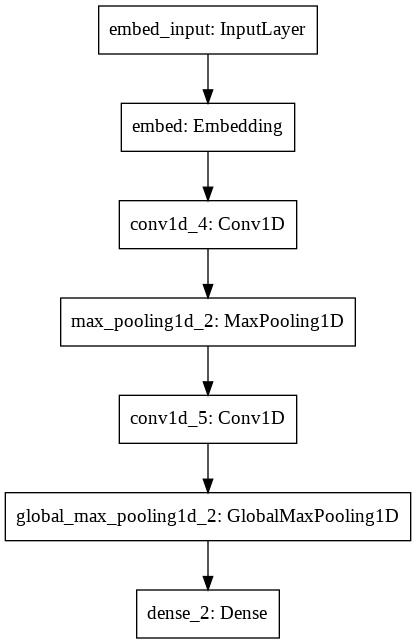

In [109]:
plot_model(model, to_file='model.png')

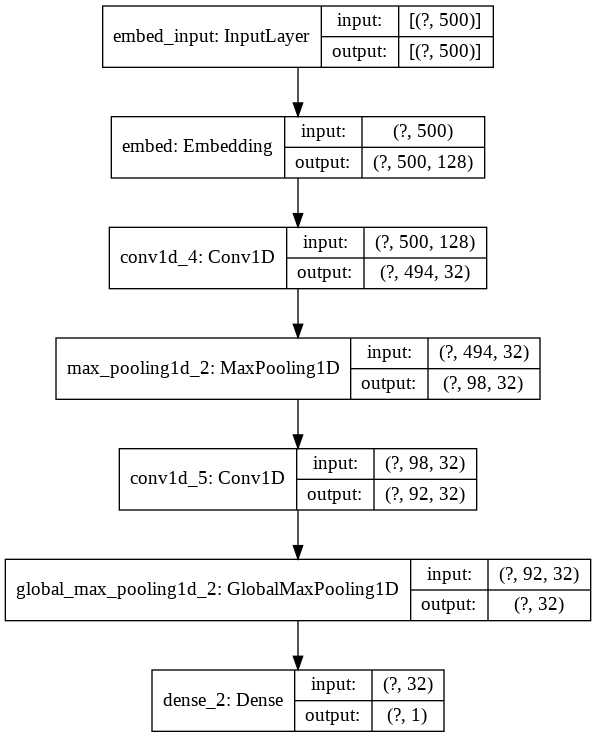

In [110]:
plot_model(model, show_shapes=True, to_file='model_shapes.png')

In [111]:
!zip -r /content/sample_data.zip /content/sample_data

  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)


In [0]:
# Downloading the TensorBoard data
from google.colab import files
files.download('/content/sample_data.zip')